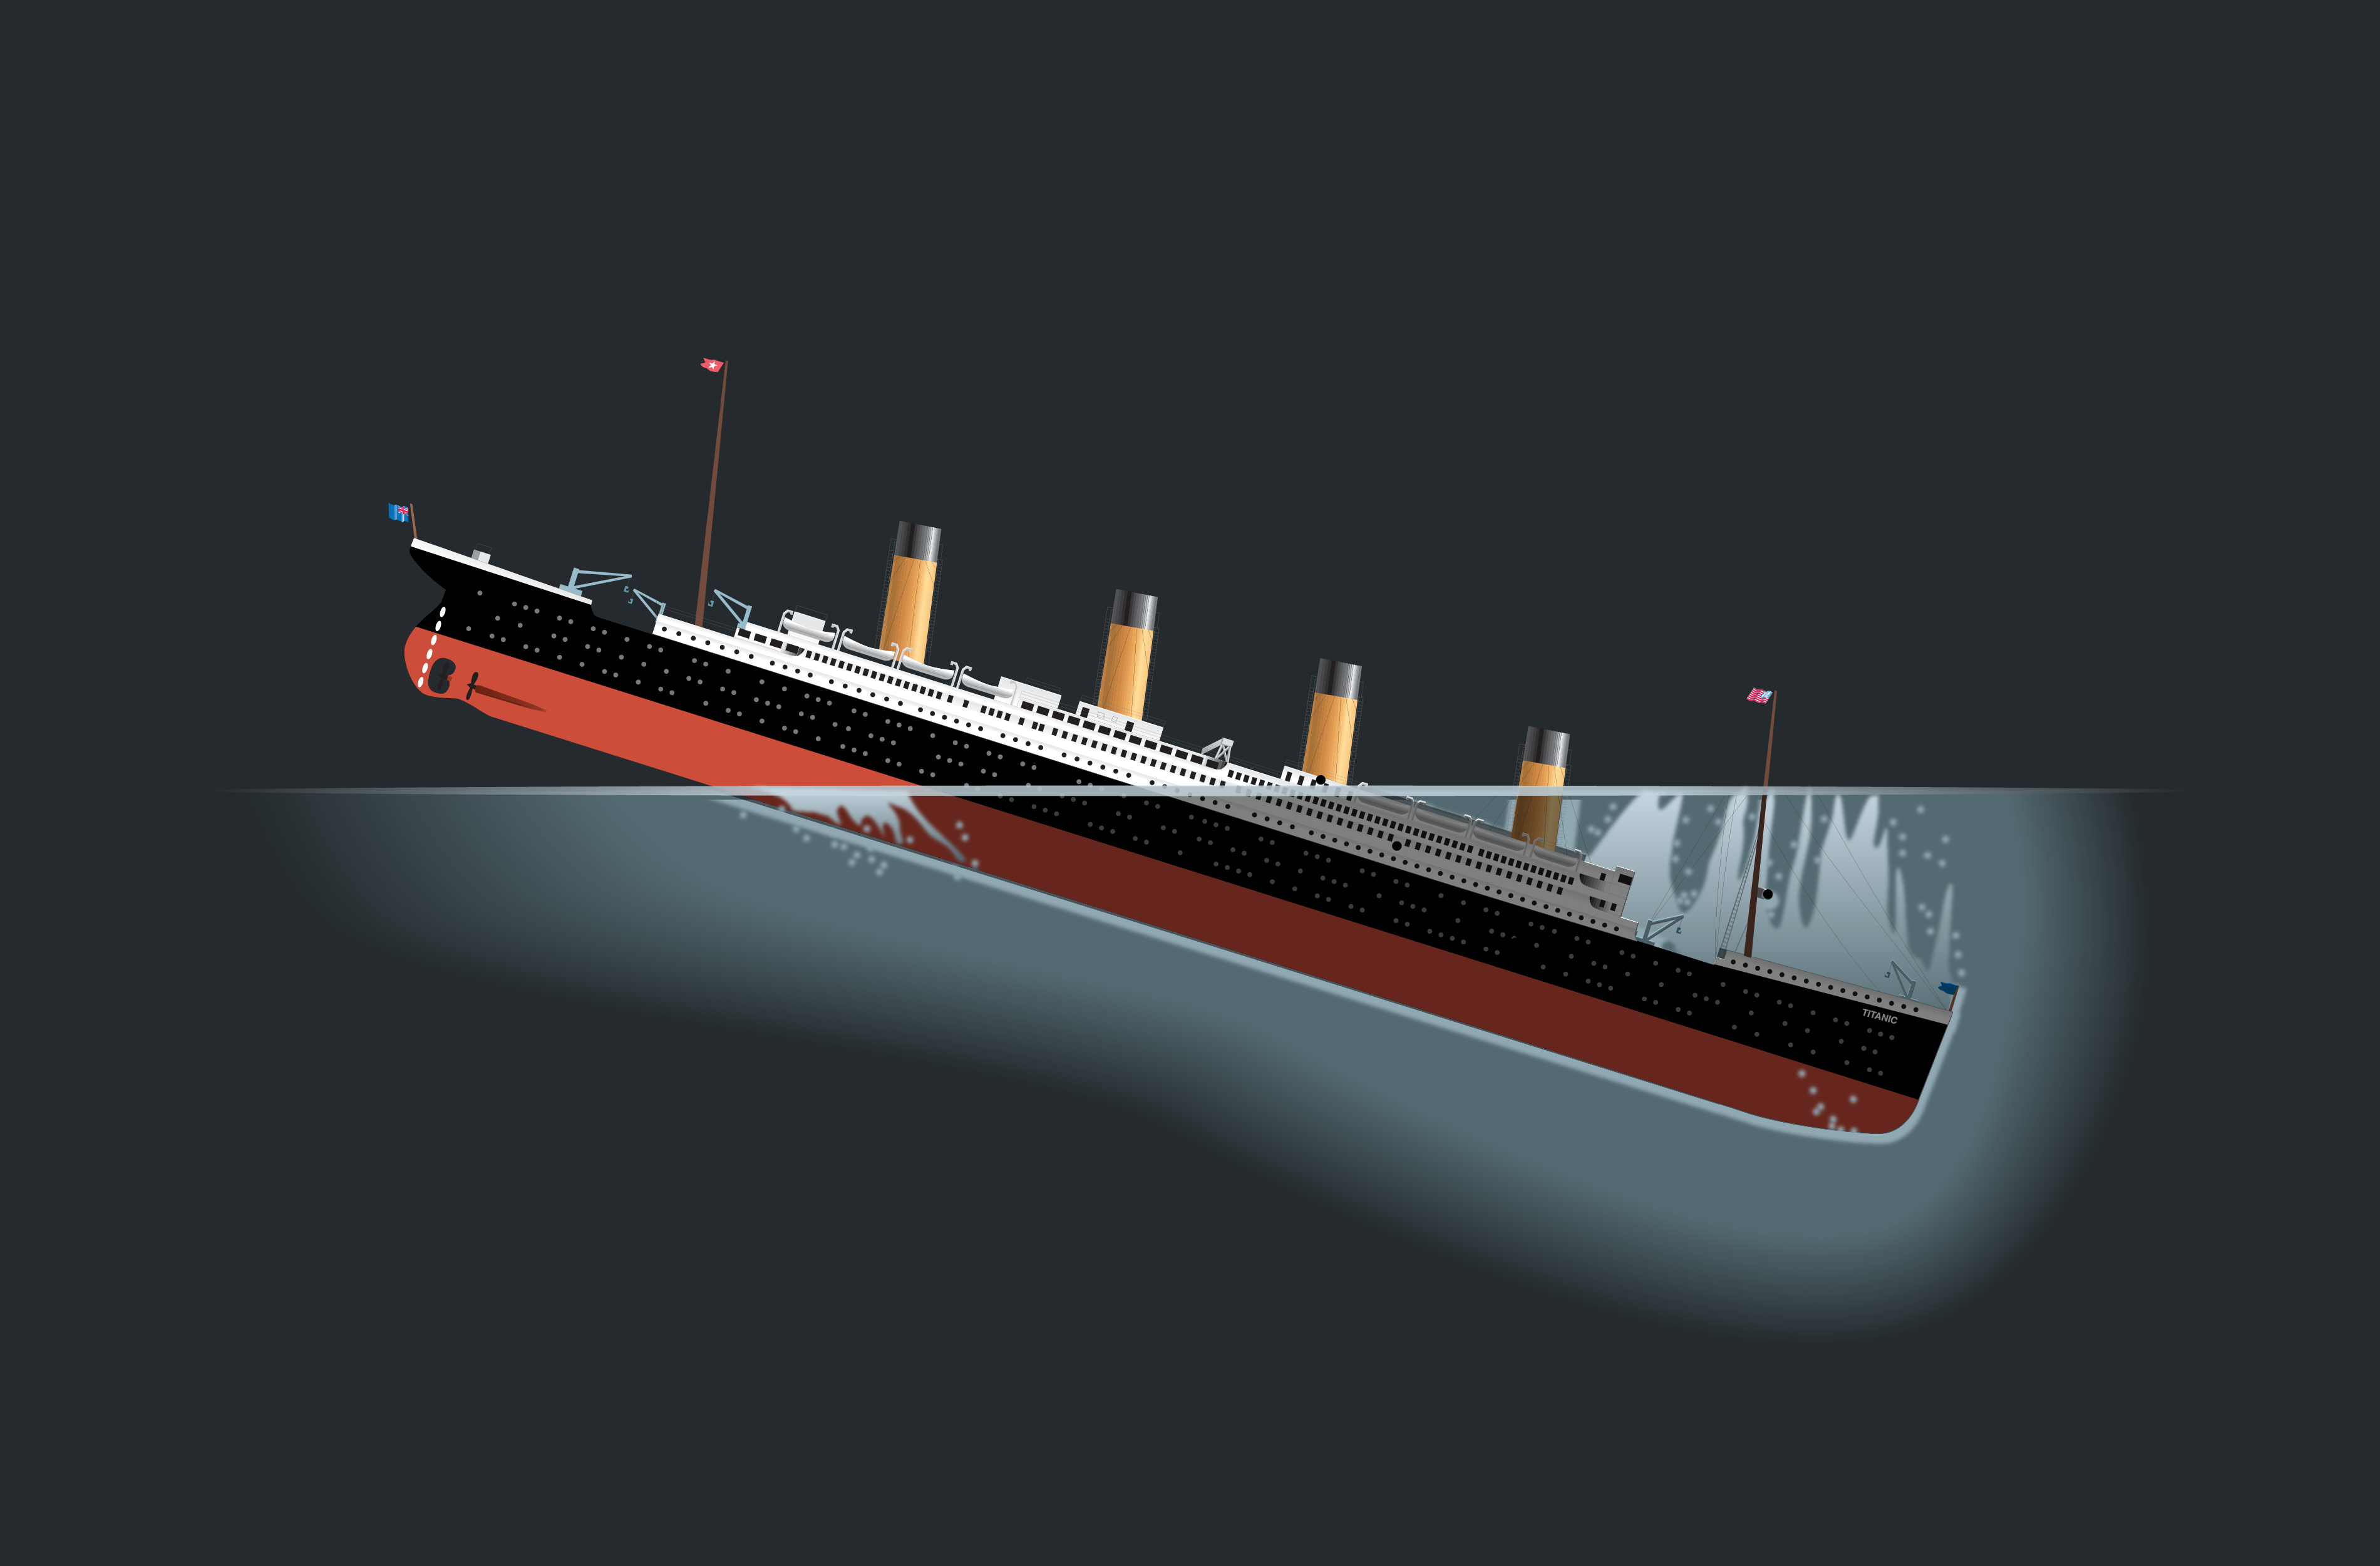

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

### Features

* pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

### Target

* Survived: need to predict whether the passenger survived

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.Age.mean()

29.69911764705882

In [12]:
#if we divide the age by class and by gender, we can see that the average age of the 1st class is higher.
df.groupby(['Sex','Pclass']).Age.median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [13]:
#fill na in Age column. Devide passangers by sex and Pclass and using median age.

f_d = {1:35,2:28,3:21.5}
m_d = {1:40,2:30,3:25}

df['Temp'] = df.query('Sex == "female"').Pclass.map(f_d)
df.Age.fillna(df.Temp,inplace=True)
df['Temp'] = df.query('Sex == "male"').Pclass.map(m_d)
df.Age.fillna(df.Temp,inplace=True)
df.drop('Temp',axis=1,inplace=True)

df_test['Temp'] = df_test.query('Sex == "female"').Pclass.map(f_d)
df_test.Age.fillna(df_test.Temp,inplace=True)
df_test['Temp'] = df_test.query('Sex == "male"').Pclass.map(m_d)
df_test.Age.fillna(df_test.Temp,inplace=True)
df_test.drop('Temp',axis=1,inplace=True)

In [14]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#fill na Embarked columns by S, since S is the most
df.Embarked.fillna('S',inplace=True)  
df_test.Embarked.fillna('S',inplace=True)  

In [16]:
#find na in df.test Fare column
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
#find mean Fare by Pclass and Embarked
df.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.514244
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [18]:
#fill na by mean Fare 
df_test.loc[152,'Fare'] = 14.64

In [19]:
#fill na by 0, notna by 1 in Cabin columns
df.loc[df.Cabin.notna(),'Cabin'] = 1
df.Cabin.fillna(0,inplace=True)

df_test.loc[df_test.Cabin.notna(),'Cabin'] = 1
df_test.Cabin.fillna(0,inplace=True)

In [20]:
df.groupby('Cabin')['Survived'].mean()

Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [21]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [22]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [24]:
df.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [25]:
#adding new column to know how big family is
df['FamSize'] = df.SibSp + df.Parch + 1

df_test['FamSize'] = df.SibSp + df.Parch + 1

In [26]:
df.groupby('FamSize')['Survived'].mean()

FamSize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [27]:
#devide family size on groups
fam_map = {1:1,2:2,3:2,4:2,5:3,6:3,7:4,8:4,11:4}

df['FamGroup'] = df.FamSize.map(fam_map)

df_test['FamGroup'] = df.FamSize.map(fam_map)

df.drop(['SibSp','Parch','FamSize'],axis=1,inplace=True)
df_test.drop(['SibSp','Parch','FamSize'],axis=1,inplace=True)

In [28]:
df.groupby('FamGroup')['Survived'].mean()

FamGroup
1    0.303538
2    0.578767
3    0.162162
4    0.160000
Name: Survived, dtype: float64

In [29]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [30]:
emb = pd.get_dummies(df.Embarked,prefix='emb')
emb_test = pd.get_dummies(df_test.Embarked,prefix='emb')

In [31]:
df = df.join(emb)
df.drop('Embarked',axis=1,inplace=True)

df_test = df_test.join(emb)
df_test.drop('Embarked',axis=1,inplace=True)

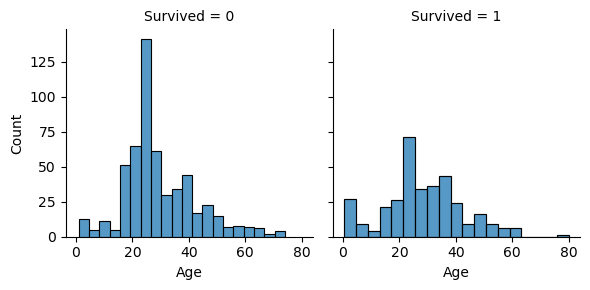

In [32]:
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Age')

In [33]:
df['Age_cut'] = pd.qcut(df.Age,10)

In [34]:
df.groupby('Age_cut')['Survived'].mean()

Age_cut
(0.419, 16.0]    0.550000
(16.0, 20.0]     0.341772
(20.0, 22.0]     0.436170
(22.0, 25.0]     0.213415
(25.0, 26.0]     0.333333
(26.0, 30.0]     0.396040
(30.0, 34.0]     0.434783
(34.0, 40.0]     0.456897
(40.0, 47.0]     0.295082
(47.0, 80.0]     0.415730
Name: Survived, dtype: float64

In [35]:
#devide ages on groups
df.loc[df.Age <= 16,'Age'] = 1
df.loc[(df.Age > 16)&(df.Age <= 20),'Age'] = 2
df.loc[(df.Age > 20)&(df.Age <= 22),'Age'] = 3
df.loc[(df.Age > 22)&(df.Age <= 25),'Age'] = 4
df.loc[(df.Age > 25)&(df.Age <= 26),'Age'] = 5
df.loc[(df.Age > 26)&(df.Age <= 30),'Age'] = 6
df.loc[(df.Age > 30)&(df.Age <= 34),'Age'] = 7
df.loc[(df.Age > 34)&(df.Age <= 40),'Age'] = 8
df.loc[(df.Age > 40)&(df.Age <= 47),'Age'] = 9
df.loc[(df.Age > 47)&(df.Age <= 80),'Age'] = 10

df_test.loc[df_test.Age <= 16,'Age'] = 1
df_test.loc[(df_test.Age > 16)&(df_test.Age <= 20),'Age'] = 2
df_test.loc[(df_test.Age > 20)&(df_test.Age <= 22),'Age'] = 3
df_test.loc[(df_test.Age > 22)&(df_test.Age <= 25),'Age'] = 4
df_test.loc[(df_test.Age > 25)&(df_test.Age <= 26),'Age'] = 5
df_test.loc[(df_test.Age > 26)&(df_test.Age <= 30),'Age'] = 6
df_test.loc[(df_test.Age > 30)&(df_test.Age <= 34),'Age'] = 7
df_test.loc[(df_test.Age > 34)&(df_test.Age <= 40),'Age'] = 8
df_test.loc[(df_test.Age > 40)&(df_test.Age <= 47),'Age'] = 9
df_test.loc[(df_test.Age > 47)&(df_test.Age <= 80),'Age'] = 10

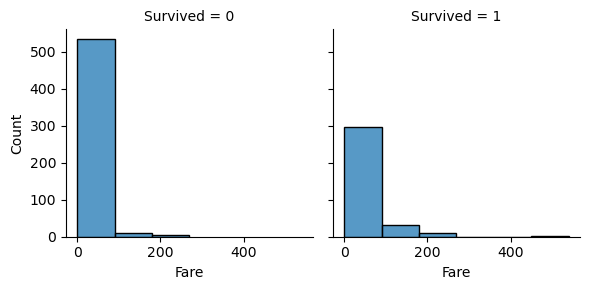

In [36]:
g = sns.FacetGrid(df,col='Survived')
g.map(sns.histplot,'Fare',binwidth=90)

In [37]:
df['Fare_cut'] = pd.qcut(df.Fare,5)

In [38]:
df.groupby('Fare_cut')['Survived'].mean()

Fare_cut
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

In [39]:
#devide fare on groups
df.loc[df.Fare <= 7.854,'Fare'] = 1
df.loc[(df.Fare > 7.854)&(df.Fare <= 10.5),'Fare'] = 2
df.loc[(df.Fare > 10.5)&(df.Fare <= 21.679),'Fare'] = 3
df.loc[(df.Fare > 21.679)&(df.Fare <= 39.688),'Fare'] = 4
df.loc[(df.Fare > 39.688)&(df.Fare <= 512.329),'Fare'] = 5

df_test.loc[df_test.Fare <= 7.854,'Fare'] = 1
df_test.loc[(df_test.Fare > 7.854)&(df_test.Fare <= 10.5),'Fare'] = 2
df_test.loc[(df_test.Fare > 10.5)&(df_test.Fare <= 21.679),'Fare'] = 3
df_test.loc[(df_test.Fare > 21.679)&(df_test.Fare <= 39.688),'Fare'] = 4
df_test.loc[(df_test.Fare > 39.688)&(df_test.Fare <= 512.329),'Fare'] = 5


In [40]:
df['Name_len'] = df.Name.str.len()
df_test['Name_len'] = df_test.Name.str.len()

<Axes: xlabel='Name_len', ylabel='Density'>

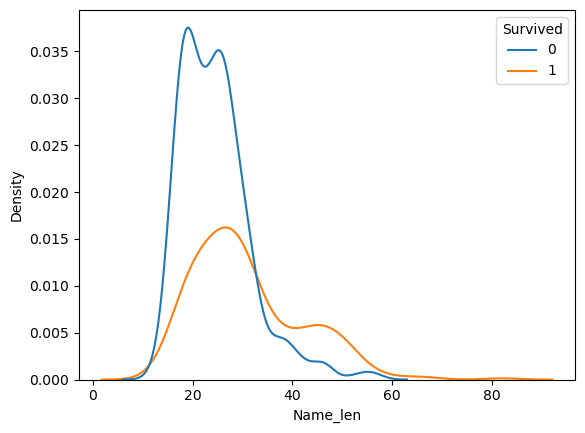

In [41]:
#the plot shows the relationship between the length of the name and the survival rate
sns.kdeplot(data=df,x='Name_len',hue='Survived')

In [42]:
df['Name_group'] = pd.qcut(df.Name_len,7)

In [43]:
df.groupby('Name_group')['Survived'].mean()

Name_group
(11.999, 18.0]    0.214286
(18.0, 21.0]      0.272727
(21.0, 24.0]      0.325000
(24.0, 27.0]      0.305195
(27.0, 30.0]      0.428571
(30.0, 36.0]      0.505155
(36.0, 82.0]      0.720000
Name: Survived, dtype: float64

In [44]:
df.loc[df.Name_len <= 18.0,'Name'] = 1
df.loc[(df.Name_len > 18.0)&(df.Name_len <= 21),'Name'] = 2
df.loc[(df.Name_len > 21)&(df.Name_len <= 24),'Name'] = 3
df.loc[(df.Name_len > 24)&(df.Name_len <= 27),'Name'] = 4
df.loc[(df.Name_len > 27)&(df.Name_len <= 30),'Name'] = 5
df.loc[(df.Name_len > 30)&(df.Name_len <= 36),'Name'] = 6
df.loc[(df.Name_len > 36)&(df.Name_len <= 82),'Name'] = 7

df_test.loc[df_test.Name_len <= 18.0,'Name'] = 1
df_test.loc[(df_test.Name_len > 18.0)&(df_test.Name_len <= 21),'Name'] = 2
df_test.loc[(df_test.Name_len > 21)&(df_test.Name_len <= 24),'Name'] = 3
df_test.loc[(df_test.Name_len > 24)&(df_test.Name_len <= 27),'Name'] = 4
df_test.loc[(df_test.Name_len > 27)&(df_test.Name_len <= 30),'Name'] = 5
df_test.loc[(df_test.Name_len > 30)&(df_test.Name_len <= 36),'Name'] = 6
df_test.loc[(df_test.Name_len > 36)&(df_test.Name_len <= 82),'Name'] = 7

In [45]:
df.drop(['Name_len','Name_group','PassengerId','Ticket','Age_cut','Fare_cut'],axis=1,inplace=True)
df_test.drop(['Name_len','Ticket'],axis=1,inplace=True)

In [46]:
df.Sex = np.where(df.Sex=='male',1,0)
df_test.Sex = np.where(df_test.Sex=='male',1,0)

In [47]:
df.Pclass = df.Pclass.map({1:'low',2:'aver',3:'high'})
cl = pd.get_dummies(df.Pclass,prefix='cls')
df = df.join(cl)
df.drop('Pclass',axis=1,inplace=True)

df_test.Pclass = df_test.Pclass.map({1:'low',2:'aver',3:'high'})
cl_test = pd.get_dummies(df_test.Pclass,prefix='cls')
df_test = df_test.join(cl)
df_test.drop('Pclass',axis=1,inplace=True)


**Preparation for Cross-Validation**

In [48]:
df

,Survived,Name,Sex,Age,Fare,Cabin,FamGroup,emb_C,emb_Q,emb_S,cls_aver,cls_high,cls_low
0,0,3,1,3.0,1.0,0,2,0,0,1,0,1,0
1,1,7,0,8.0,5.0,1,2,1,0,0,0,0,1
2,1,3,0,5.0,2.0,0,1,0,0,1,0,1,0
3,1,7,0,8.0,5.0,1,2,0,0,1,0,0,1
4,0,3,1,8.0,2.0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,6.0,3.0,0,1,0,0,1,1,0,0
887,1,5,0,2.0,4.0,1,1,0,0,1,0,0,1
888,0,7,0,3.0,4.0,0,2,0,0,1,0,1,0
889,1,2,1,5.0,4.0,1,1,1,0,0,0,0,1


In [49]:
target = 'Survived'
features = [col for col in df.columns if col != 'Survived']

In [50]:
features

['Name',
 'Sex',
 'Age',
 'Fare',
 'Cabin',
 'FamGroup',
 'emb_C',
 'emb_Q',
 'emb_S',
 'cls_aver',
 'cls_high',
 'cls_low']

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [52]:
kf = KFold(n_splits = 5)

**Logistic Regression**

In [62]:
model = LogisticRegression(max_iter=1000) 
sfs = SequentialFeatureSelector(model, cv=kf) 
sfs.fit(df[features], df['Survived']) 
sfs.get_feature_names_out() 

array(['Name', 'Sex', 'Age', 'Cabin', 'FamGroup', 'cls_high'],
      dtype=object)

In [63]:
log_reg_features = sfs.get_feature_names_out()

In [64]:
for train_ind,val_ind in kf.split(df):
    
    train = df.loc[train_ind].copy()
    valid = df.loc[val_ind].copy()
    
    model = LogisticRegression(max_iter = 1000)
    model.fit(train[features],train[target])
    
    df.loc[val_ind,'pridict_log_regr'] = model.predict(valid[features])

In [65]:
log_reg = accuracy_score(df[target],df['pridict_log_regr'])
log_reg

0.8069584736251403

Accuracy score for Logistic Regression algorithm is `0.806`

**KNeighborsClassifier**

In [58]:
d={}
for i in range(1,101):
    for ind_train,ind_val in kf.split(df):
        train = df.loc[ind_train].copy()
        val = df.loc[ind_val].copy()

        scaler = MinMaxScaler()
        scaler.set_output(transform='pandas')
        scaler.fit(train[features])

        train[features] = scaler.transform(train[features])
        val[features] = scaler.transform(val[features])

        model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
        model.fit(train[features],train[target])

        df.loc[ind_val,'predict_KNN'] = model.predict(val[features])
            
    d[i] = d.get(i,accuracy_score(df[target],df['predict_KNN']))

            

<Axes: >

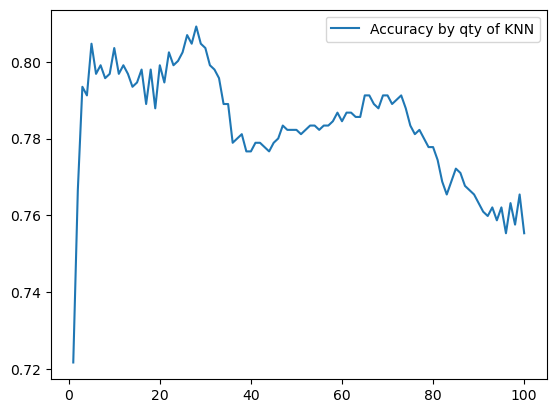

In [59]:
knn_df = pd.DataFrame({'Accuracy by qty of KNN':d.values()},index=d.keys())
sns.lineplot(data=knn_df)

In [65]:
knn_df.idxmax()

Accuracy by qty of KNN    28
dtype: int64

In [66]:
knn_df.max()[0]

0.8092031425364759

Accuracy score for KNN algorithm is maximum with `28` neighbors and the result is `0.809`

In [61]:
#df_test['Survived'] = model.predict(df[features])

In [ ]:
#KNN = df_test[['PassengerId','Survived']]

In [ ]:
#KNN.to_csv('KNN.csv',index=False)

**Decision Tree**

In [66]:
d_min_samples_leaf = {}

for i in range(2,100):
    for train_ind,valid_ind in kf.split(df):

        train = df.loc[train_ind].copy()
        valid = df.loc[valid_ind].copy()

        model = DecisionTreeClassifier(min_samples_leaf = i)
        model.fit(train[features],train[target]) 

        df.loc[valid_ind,'predict_tree'] = model.predict(valid[features])
    d_min_samples_leaf[i] = d_min_samples_leaf.get(i,accuracy_score(df[target],df['predict_tree']))

In [74]:
print(f'The min_samples_leaf parameter with the number of {max(d_min_samples_leaf,key=d_min_samples_leaf.get)} turned out to be the best')
print(f'Accuracy score is {round(max(d_min_samples_leaf.values()),3)}')

The min_samples_leaf parameter with the number of 45 turned out to be the best
Accuracy score is 0.816


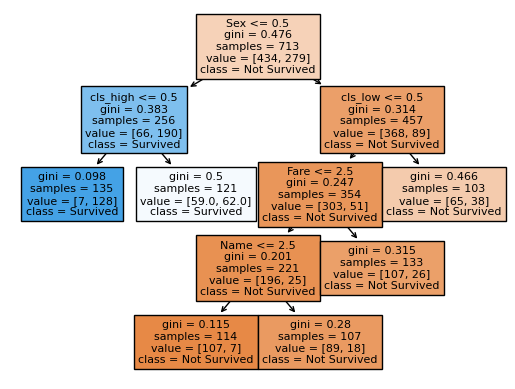

In [75]:
_ = tree.plot_tree(model, feature_names = features, class_names = ['Not Survived', 'Survived'], 
filled=True)

In [76]:
#df_test['Survived'] = model.predict(df_test[features])

In [77]:
#Des_tree = df_test[['PassengerId','Survived']]

In [78]:
#Des_tree.to_csv('des_tree.csv',index=False)

**Random Forest**

In [100]:
for train_ind,valid_ind in kf.split(df):

        train = df.loc[train_ind].copy()
        valid = df.loc[valid_ind].copy()

        model = RandomForestClassifier(n_estimators = 300, max_features = 5,bootstrap=True,max_leaf_nodes=30)
        model.fit(train[features],train[target]) 

        df.loc[valid_ind,'predict_forest'] = model.predict(valid[features])

In [101]:
print(f'Accuracy score for Random Forest algorithm is {round(accuracy_score(df[target],df["predict_forest"]),3)}')

Accuracy score for Random Forest algorithm is 0.817


In [103]:
#-------------------------------------------------------

In [91]:
#df_test.loc[:,'Survived'] = model.predict(df_test.loc[:,features])

In [92]:
#random_forest = df_test[['PassengerId','Survived']]

In [215]:
#random_forest.to_csv('random_forest.csv',index=False)

In [65]:
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#import time

In [66]:
#n = 150
#models = {
#    'XGBoost': XGBClassifier(random_state = 78, n_estimators=n,max_depth=3,subsample=0.8,eval_metric='auc',colsample_bytree=0.5),
#    'LightGBM': LGBMClassifier(verbose=-100,random_state = 2, n_estimators=n, max_depth=3),
#    'CatBoost': CatBoostClassifier(verbose=0,random_state=44, n_estimators=n,max_depth=3)
#    }

In [94]:
#result = {}
#for name, model in models.items():
#    time_start = time.time()
#    model.fit(df[features],df[target])
#    time_taken = time.time() - time_start
#    pred_train = model.predict(df[features])
#    pred_test = model.predict(df_test[features])
#    train_score = accuracy_score(df[target],pred_train)
#    test_score = accuracy_score(df_test[target],pred_test)
#    
#    result[name] = {'train_score': train_score,
#                   'test_score': test_score,
#                   'time': time_taken}

In [ ]:
#pd.DataFrame(result)